# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [10]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy

In [11]:
def evaluation_pbft(num_request:int, num_nodes:int, num_faulty:int):
    consensus = PBFT_Simulator(num_nodes, num_faulty)
    start = time.time()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.time()
    delay = (end-start) * 1000
    num_success = consensus.success_proof
    del consensus
    
    return (delay, num_success)

def evaluation_qpbft(num_request:int, num_managing:int, num_voting:int, num_faulty:int):
    consensus = QPBFT_Simulator(num_managing, num_voting, num_faulty)
    
    start = time.time()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.time()
    delay = (end-start) * 1000
    num_success = consensus.success_proof
    del consensus
    
    return (delay, num_success)

def evaluation_proposed_scheme(num_request:int, num_master:int, num_slave:int,  num_random:int, num_faulty:int):
    consensus = Proposed_Simulator(num_master, num_slave, num_random, num_faulty)
    start = time.time()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.time()
    delay = (end-start) * 1000
    num_success = consensus.success_proof
    del consensus
    
    return (delay, num_success)

In [12]:
num_requests = numpy.array([i for i in range(10, 301, 10)])
LENGTH = num_requests.shape[0]

## PBFT Algorithm

In [13]:
delays_pbft = numpy.array([])
proability_pbft = numpy.array([])

for i in range(LENGTH):
    result = evaluation_pbft(num_requests[i], 10, 2)
    delays_pbft = numpy.append(delays_pbft, result[0])
    proability_pbft = numpy.append(proability_pbft, result[1]/(num_requests[i] * 1.0))

## QPBFT Algorithm

In [14]:
delays_qpbft = numpy.array([])
proability_qpbft = numpy.array([])

for i in range(LENGTH):
    result = evaluation_qpbft(num_requests[i], 6, 4, 2)
    delays_qpbft = numpy.append(delays_qpbft, result[0])
    proability_qpbft = numpy.append(proability_qpbft, result[1]/(num_requests[i] * 1.0))

## Proposed Scheme 1
> num_random = 4

In [15]:
delays_proposed = numpy.array([])
proability_proposed = numpy.array([])

for i in range(LENGTH):
    result = evaluation_proposed_scheme(num_requests[i], 6, 4, 4, 2)
    delays_proposed = numpy.append(delays_proposed, result[0])
    proability_proposed = numpy.append(proability_proposed, result[1]/(num_requests[i] * 1.0))

> num_random = 6

In [16]:
delays_proposed2 = numpy.array([])
proability_proposed2 = numpy.array([])

for i in range(LENGTH):
    result = evaluation_proposed_scheme(num_requests[i], 6, 4, 6, 2)
    delays_proposed2 = numpy.append(delays_proposed2, result[0])
    proability_proposed2 = numpy.append(proability_proposed2, result[1]/(num_requests[i] * 1.0))

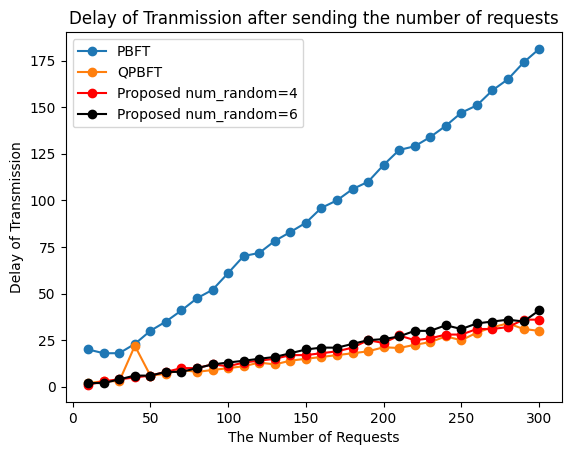

In [17]:
import matplotlib.pyplot as plot

plot.plot(num_requests, delays_pbft, label = "PBFT", marker="o")
plot.plot(num_requests, delays_qpbft, label = "QPBFT", marker="o")
plot.plot(num_requests, delays_proposed, label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, delays_proposed2, label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Delay of Transmission")
plot.title("Delay of Tranmission after sending the number of requests")
plot.show()

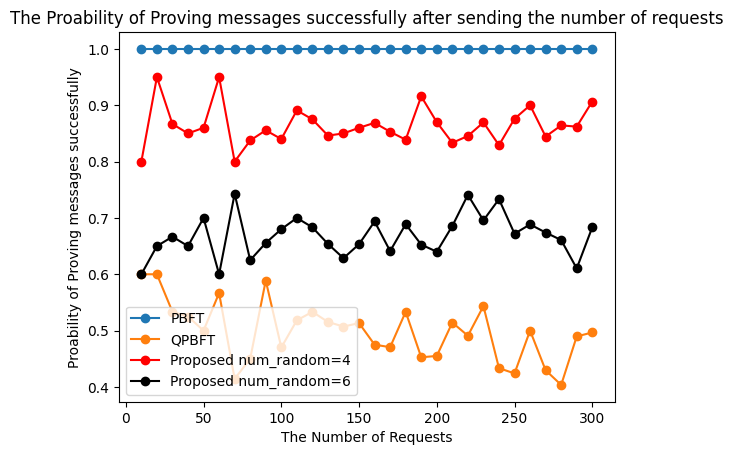

In [18]:
plot.plot(num_requests, proability_pbft, label = "PBFT", marker="o")
plot.plot(num_requests, proability_qpbft, label = "QPBFT", marker="o")
plot.plot(num_requests, proability_proposed, label = "Proposed num_random=4", color="red", marker="o")
plot.plot(num_requests, proability_proposed2, label = "Proposed num_random=6", color="black", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Proability of Proving messages successfully")
plot.title("The Proability of Proving messages successfully after sending the number of requests")
plot.show()